<a href="https://colab.research.google.com/github/AmoguJUduka/MachineLearning/blob/main/DeepLearningAssignments/SpamDataset_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

This assignment is focused on using logistic regression on the Spam dataset. This dataset contains email spam data for 4601 email messages.

Import necessary libraries

In [1]:
import pandas as pd   # Used to read the spam dataset
import numpy as np  # Used to perform mathematical operations on matrices
import matplotlib.pyplot as plt # Data Visualization
from sklearn.model_selection import train_test_split  # Splitting Data into test and training sets
from sklearn.preprocessing import StandardScaler # Scaling and Normalization

Download the required dataset and inspect it

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

In [3]:
column_names = [f"feature_{i}" for i in range(57)] + ["target"]
data = pd.read_csv(url, names=column_names)

In [4]:
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
data.tail()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,target
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
data.isnull().sum()

,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0


In [7]:
data.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54',
       'feature_55', 'feature_56', 'target'],
      dtype='object')

This dataset contains 57 features and has 4601 examples

**Split the data into features (X) and target (y)**

In [8]:
X = data.iloc[:, :-1].values  # Numpy Arrays
y = data.iloc[:, -1].values  # Numpy Arrays

In [9]:
X

array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 3.756e+00, 6.100e+01,
        2.780e+02],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 5.114e+00, 1.010e+02,
        1.028e+03],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 1.404e+00, 6.000e+00,
        1.180e+02],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 1.147e+00, 5.000e+00,
        7.800e+01],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 1.250e+00, 5.000e+00,
        4.000e+01]])

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

In [12]:
X_train

array([[0.000e+00, 0.000e+00, 9.600e-01, ..., 1.117e+00, 4.000e+00,
        3.800e+01],
       [2.000e-02, 0.000e+00, 1.000e-01, ..., 2.984e+00, 5.200e+01,
        1.758e+03],
       [0.000e+00, 0.000e+00, 2.040e+00, ..., 1.428e+00, 3.000e+00,
        2.000e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.300e+00, 4.000e+00,
        1.300e+01],
       [3.400e-01, 2.600e-01, 2.600e-01, ..., 3.335e+00, 6.200e+01,
        5.370e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+00, 1.500e+01,
        6.500e+01]])

In [13]:
X_test

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        5.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 1.600e+01,
        3.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.411e+00, 2.800e+01,
        1.866e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.940e+00, 1.200e+01,
        9.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.555e+00, 1.300e+01,
        8.200e+01],
       [0.000e+00, 0.000e+00, 1.100e-01, ..., 2.419e+00, 2.700e+01,
        5.590e+02]])

In [14]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [15]:
y_test

array([0, 1, 0, ..., 1, 1, 0])

Defining functions for performing the logistic regression on the spam datasets.

In [16]:
def sigmoid(z):
  """
    Input:
    z: represents the sigmoid parameter
    Output:
    returns the sigmoid function

  """
  sig = 1 / (1 + np.exp(-z))
  sig = np.clip(sig, 1e-7, 1 - 1e-7)  # To prevent overflow
  return sig

In [17]:
def compute_cost(X, y, theta):
    """
    Input:
    X: Matrix of size (nx, m)
    y: Vector of size (1, m)
    theta: Vector of size (nx, 1)

    Output:
    returns the cost of the logistic regression
    """
    m = len(y)  # number of learning examples
    h = sigmoid(X @ theta)  # predicted probabilities
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) # Cost Function (Cross Entropy loss function)
    return cost

In [18]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):  # Trying to minimize the loss
    """
    Input:
    X: Matrix of size (nx, m)
    y: Vector of size (1, m)
    theta: Vector of size (nx,1)

    Output:
    returns the optimized theta vector and costs
    """

    m = len(y)
    costs = []

    for _ in range(num_iterations):  # For the iterations
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

In [19]:
def predict(X, theta):
    """
    Input:
    X: Matrix of size (nx, m)
    theta: Vector of size (nx, 1)

    Output:
    returns the predicted labels
    """
    return sigmoid(X @ theta) >= 0.5

Putting it all together

In [20]:
def logistic_regression(X_train, y_train, X_test, y_test, learning_rate, num_iterations):

    # Add a column of ones to the features for the intercept term
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Initially, all parameters are set to zero
    theta = np.zeros(X_train.shape[1])

    # Train the model
    theta, costs = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

    # Make predictions
    y_pred_train = predict(X_train, theta)
    y_pred_test = predict(X_test, theta)

    # Calculate accuracy
    train_accuracy = np.mean(y_pred_train == y_train)
    test_accuracy = np.mean(y_pred_test == y_test)

    return theta, costs, train_accuracy, test_accuracy

<ipython-input-16-483380471c2c>:9: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))


Results without normalization:
Training Accuracy: 0.4826
Test Accuracy: 0.4726


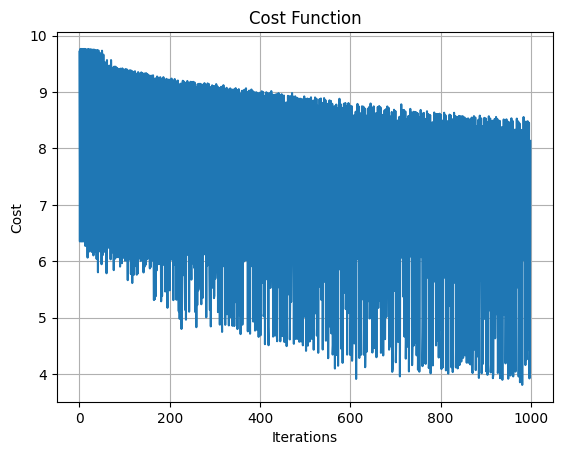

In [21]:
learning_rate = 0.1
num_iterations = 1000

theta, costs, train_accuracy, test_accuracy = logistic_regression(X_train, y_train, X_test, y_test, learning_rate, num_iterations)

print("Results without normalization:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the cost function
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.grid()
plt.show()


Results with normalization:
Training Accuracy: 0.9214
Test Accuracy: 0.9231


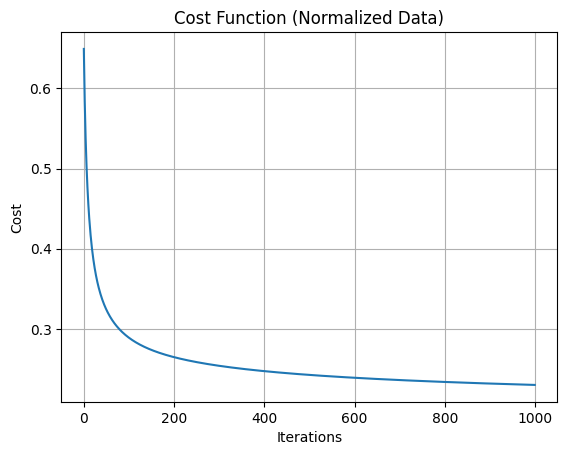

In [22]:
# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Run logistic regression with normalized data
theta_norm, costs_norm, train_accuracy_norm, test_accuracy_norm = logistic_regression(X_train_normalized, y_train, X_test_normalized, y_test, learning_rate, num_iterations)

print("\nResults with normalization:")
print(f"Training Accuracy: {train_accuracy_norm:.4f}")
print(f"Test Accuracy: {test_accuracy_norm:.4f}")

# Plot the cost function for normalized data
plt.plot(costs_norm)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function (Normalized Data)')
plt.grid()
plt.show()